First, we load all required modules:

In [1]:
import numpy as np

import sys
sys.path.insert(1, '../')

import seisplot

Then we load some seismic test data to plot. Here, the data have been previously stored as .npy file, originally read by the seisio package from either SEG-Y or SU and delivered as Numpy structured array. After loading the .npy file, `cmpgather` contains the data set consisting of trace headers and the actual seismic trace values.

In [2]:
cmpgather = np.load("data/cmp.npy")
cmpnum = cmpgather["cdp"][0]
nt = len(cmpgather)
print(nt)

101


The data (a single CMP gather) consists of 101 traces. We also get the `cdp` trace header from the first trace, which we will use to set a title later on. Getting a basic plot of the data (stored in the Numpy structured array) can be as simple as:

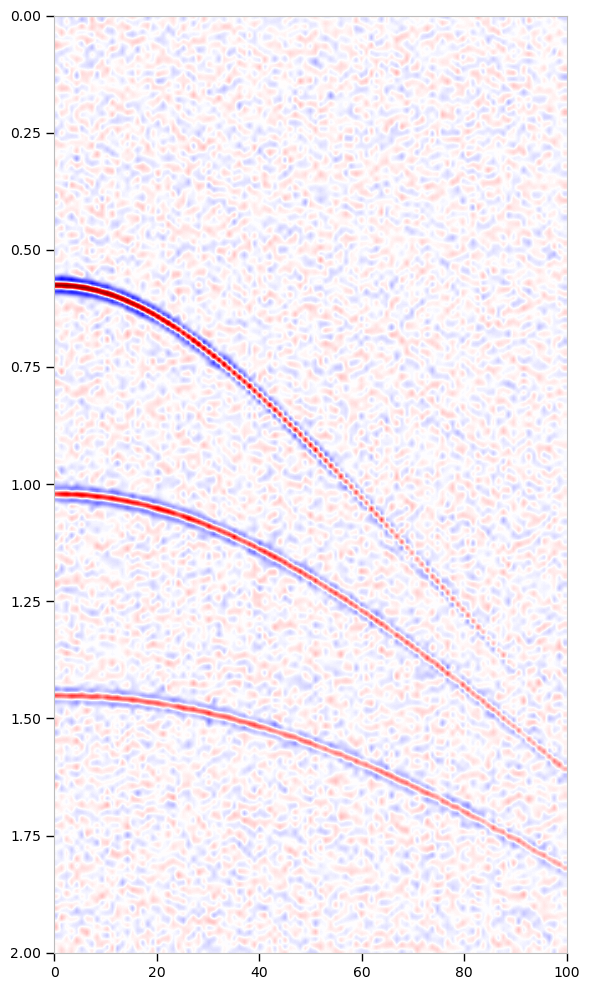

In [3]:
fig, ax = seisplot.plot(cmpgather)

Obviously, we have't told seisplot anything about the axes etc. Nevertheless, the vertical (time) axis looks reasonable, and on the horizontal axis we simply have the trace index. That's the best seisplot could do with the available information. Note: In case we passed a plain Numpy array without trace header information, the vertical axis would be the sample number. In this case, seisplot extracted the sampling interval and delay recording time as well as the number of samples from the first trace header and used it to create a time axis.

Let's try to improve this plot. It would be nice to have offsets displayed on the horizontal axis. We could also do with some labels. As we have a Numpy structured array that also contains trace headers, we can simply tell seisplot to use the `offset` trace header as horizontal axis. However, we could also pass an array with explicit offset values (the array would need 101 entries, an offset value for each trace). We can use the `vlabel`, `hlabel` and `title` parameters to annotate our plot ("v" for vertical axis, "h" for horizontal axis).

We also make the plot a little smaller.

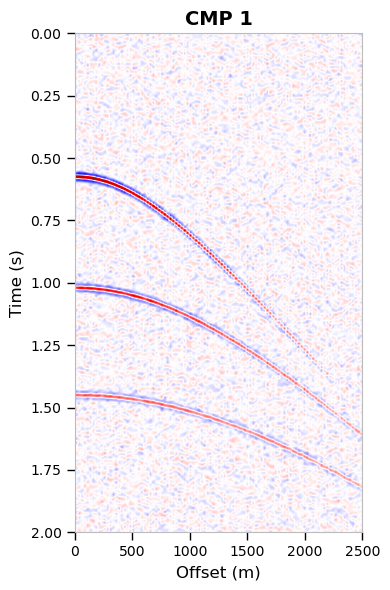

In [4]:
fig, ax = seisplot.plot(cmpgather, haxis="offset", width=4, height=6,
                        vlabel="Time (s)", hlabel="Offset (m)", title=f"CMP {cmpnum}")

That's already a pretty decent display of our seismic data. Let's add also some grid lines so we can better judge the moveout of the events, and modify the major ticks on the vertical axis to be drawn every 0.2 seconds. We also add some minor ticks along the vertical and horizontal axis, respectively; for instance, a minor tick every 0.1 seconds on the vertical and every 100 meters on the horizontal axis.

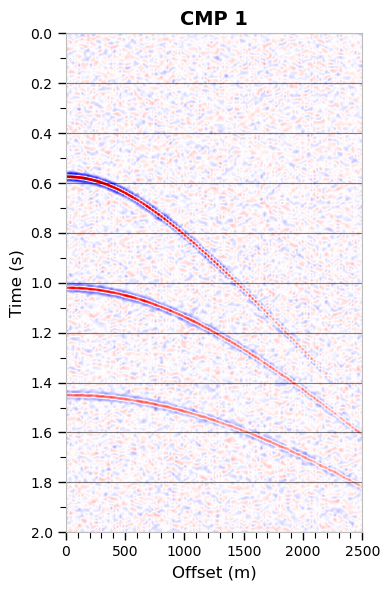

In [5]:
fig, ax = seisplot.plot(cmpgather, haxis="offset", width=4, height=6,
                        vlabel="Time (s)", hlabel="Offset (m)", title=f"CMP {cmpnum}", 
                        vmajorticks=0.2, vgrid="major", vminorticks=0.1, hminorticks=100)

That's all pretty easy, isn't it?!